In [1]:
!ls

LCSPP_AVHRR_v3.2_202212b.nc  sample_data


In [3]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the NetCDF file using xarray
file_path = "LCSPP_AVHRR_v3.2_202212b.nc"
ds = xr.open_dataset(file_path)

# Display dataset information
ds


<xarray.Dataset> Size: 337MB
Dimensions:            (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-12-23
  * lat                (lat) float64 29kB 89.97 89.92 89.87 ... -89.92 -89.97
  * lon                (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 180.0
Data variables:
    lcspp_clear_inst   (time, lat, lon) float32 104MB ...
    lcspp_clear_daily  (time, lat, lon) float32 104MB ...
    lcspp_all_daily    (time, lat, lon) float32 104MB ...
    lcspp_qa           (time, lat, lon) uint8 26MB ...
Attributes:
    title:               Long-term Continuous SIF-informed Photosynthesis Pro...
    spatial_resolution:  0.050000 degrees per pixel
    geospatial_lat_min:  -90
    geospatial_lat_max:  90
    geospatial_lon_min:  -180
    geospatial_lon_max:  180
    product_version:     v3.2
    doi:                 10.5281/zenodo.11906675
    filename_notation:   a: day1-day15 of the month, b:day16-last day of the ...
    contacts:            Jianing Fang (jf3423@columbia.edu), Xu Lian (xl3179@...
    date_source:         LCREF_AVHRR_v3.2, MCD43C1 v061, OCO-2 SIF Lite V11r,...
    created_date:        12/06/2024

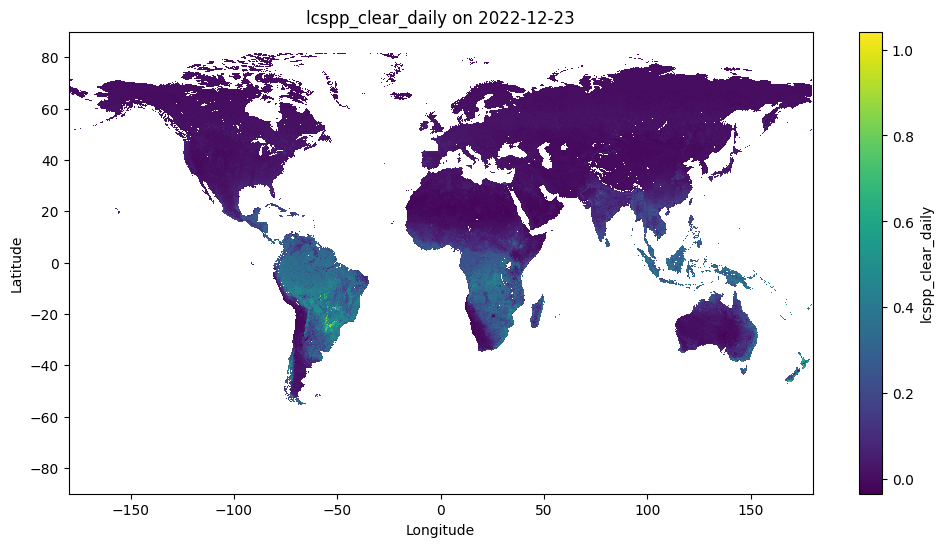

In [4]:
# Select a variable to plot, e.g., 'lcspp_clear_daily' for clear-sky daily photosynthesis data
var_name = "lcspp_clear_daily"
data = ds[var_name].isel(time=0)  # Selecting the first (and only) time index

# Create the plot
plt.figure(figsize=(12, 6))
plt.pcolormesh(ds["lon"], ds["lat"], data, shading="auto", cmap="viridis")
plt.colorbar(label=var_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"{var_name} on {str(ds['time'].values[0])[:10]}")
plt.show()


In [5]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 102.9 MB/s eta 0:00:00


<ipython-input-9-61706f3ac39b>:47: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


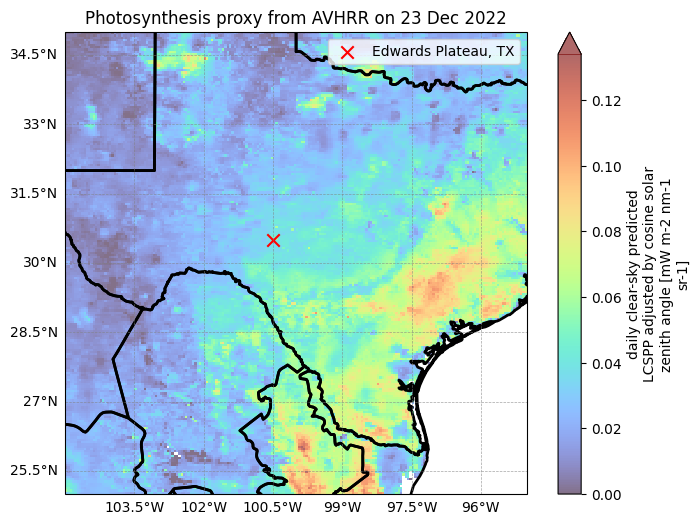

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

# Create the figure and axis with cartopy projection
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data with transparency
ds.lcspp_clear_daily.sel(lat=slice(35,25), lon=slice(-105, -95)).plot(
    cmap='turbo', alpha=0.6, ax=ax, vmin=0, extend='max'
)

# Mark Edwards Plateau
edwards_plateau_coords = (360-100.5, 30.5)  # Approximate location
ax.scatter(*edwards_plateau_coords, color='red', marker='x', s=80, label="Edwards Plateau, TX")
# ✅ Fix: Load State Boundaries from Natural Earth Shapefile
# Add country borders
ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=1, edgecolor="black", label="Country Borders")

# ✅ Add ALL state boundaries (Including Texas)
ax.add_feature(cfeature.STATES, edgecolor="black", linewidth=0.8, linestyle="-", label="State Boundaries")

# ✅ Manually highlight Texas state boundary (Thicker Line)
ax.add_feature(cfeature.STATES, edgecolor="black", linewidth=2, linestyle="-", label="Texas Border")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)

# Corrected attributes for removing top and right labels
gl.top_labels = False  # Remove top longitude labels
gl.right_labels = False  # Remove right latitude labels

# Format longitude and latitude labels
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Titles and Labels
plt.title('Photosynthesis proxy from AVHRR on 23 Dec 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend
ax.legend()

# Show the final plot
plt.savefig('lcspp.png', dpi=500)